In [14]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def props_mysql():
    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="root",  # your password
                     db="global")        # name of the data base
    return db

In [3]:
def make_query(db, query):
    cur = db.cursor()
    cur.execute(query)
    return cur


In [4]:
query = "select * from Site"
df = pd.read_sql(query, con=props_mysql())

In [5]:
keep_site_fields = ["IDSite", "Site_Country", "Site_City_State_Region",
                    "Site_Soil_Classification_Name","Site_Soil_Sand_Percentage", "Site_Soil_Silt_Percentage",
                   "Site_Soil_pH", "Site_Soil_Organic_Matter_Percentage", "Site_Soil_N_Percentage",
                   "Site_Soil_C_Percentage", "Site_Precipitation_mm", "Site_Temperature_Celsius"] 

In [6]:
#Keeping only some interesting fields
sites = df[keep_site_fields]
#removing NA
sites = sites.replace('NA',np.NaN)

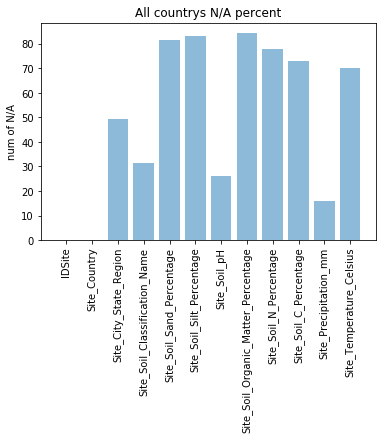

In [228]:
def make_nan_chart(df, title="All countrys N/A percent"):
    nans = df.isnull().sum()
    x_axis = list(nans.index)
    x_pos = np.arange(len(x_axis))
    y_axis = list(nans.values)
    y_percent = map(lambda y: (y*1.0/int(df.shape[0]))*100, y_axis)
    plt.bar(x_pos, y_percent, align='center', alpha=0.5)
    plt.xticks(x_pos, x_axis,  rotation='vertical')
    plt.ylabel('num of N/A') 
    plt.title(title)
    plt.show()

make_nan_chart(sites)

In [229]:
#Quero escolher uma regiao que tenha dados os suficientes para serem trabalhados nas outras tabelas
#checando numero de eventos por regiao
query = str("select count(*) as qtd_samples, Site_Country from Site group by Site_Country")
df = pd.read_sql(query, con=props_mysql())
df = df.loc[df['qtd_samples'] >= 20].sort_values(['qtd_samples'], ascending=[0])
lista_paises = list(df['Site_Country'].values)  
    

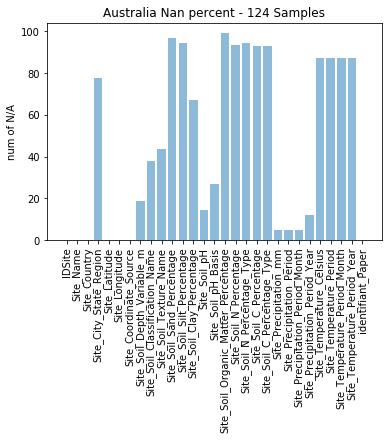

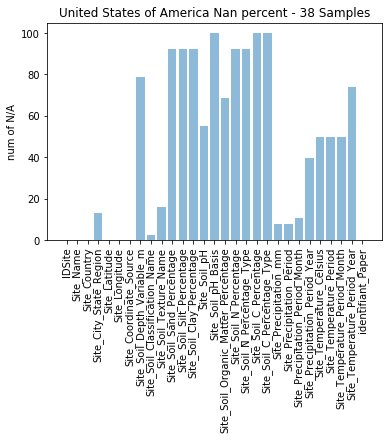

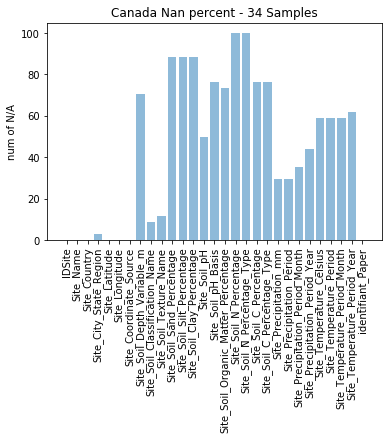

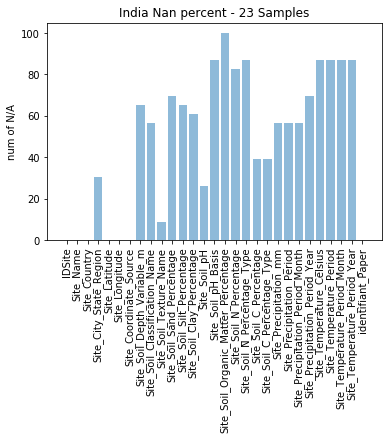

In [230]:
#checando nulos por regiao
for pais in lista_paises:
    query = str("select * from Site where Site_Country='{}'".format(pais))
    df = pd.read_sql(query, con=props_mysql())
    #Keeping only some interesting fields
    #removing NA
    country_data = df.replace('NA',np.NaN)
    make_nan_chart(country_data, title= str(pais)+" Nan percent - "+ str(country_data.shape[0]) + " Samples")
    
    

In [247]:
#Testando com australa
fields_uteis = ['IDSite', 'Site_Soil_Depth_Variable_m', 'Site_Soil_pH', 'Site_Precipitation_mm']
query = str("select IDSite, Site_Soil_Depth_Variable_m, Site_Soil_pH, Site_Precipitation_mm from Site where Site_Country= '{}'").format('Australia')
df = pd.read_sql(query, con=props_mysql())
df_australia = df.replace('NA',np.NaN)
df_australia = df_australia.dropna().reset_index()
print "Temos {} sites com todos os dados que precisamos no momento".format(len(df_australia['IDSite'].unique()))
lista_IDSites = list(df_australia['IDSite'])

Temos 96 sites com todos os dados que precisamos no momento


In [257]:
lista_teste = lista_IDSites[:1]
lista_teste

[71]

In [261]:
df_all = pd.DataFrame()
for id in lista_IDSites:
    query = str("select * from Crop as crop"
               " join Crop_Sequence_Trt as crop_s"
               " on crop.IDRotation_CropSystem = crop_s.IDRotation"
               " join Site as site"
               " on crop_s.IDSite_Site = site.IDSite"
               " where site.IDSite={}").format(id)
    df = pd.read_sql(query, con=props_mysql())
    df_all = pd.concat([df_all, df])

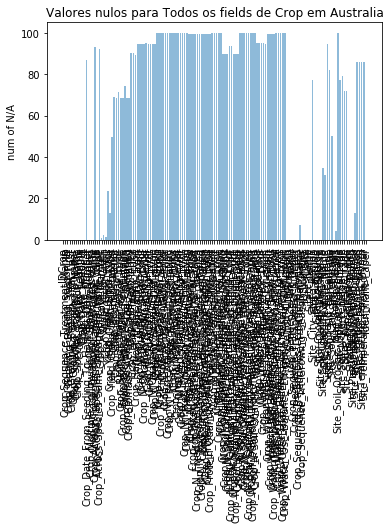

In [264]:
df_all = df_all.replace('NA',np.NaN)
make_nan_chart(df_all, title= "Valores nulos para Todos os fields de Crop em Australia")

In [306]:
nans = df_all.isnull().sum()
x_axis = list(nans.index)
y_axis = list(nans.values)
y_percent = map(lambda y: (y*1.0/int(df_all.shape[0]))*100, y_axis)

In [310]:
df_percents_all = pd.DataFrame()
df_percents_all['label'] = x_axis
df_percents_all['percents'] = y_percent

In [320]:
#df_percents_all.sort_values(['percents'], ascending=[0])
df_percents_all.loc[df_percents_all['percents'] < 25]

,label,percents
0,IDCrop,0.000000
1,Crop_Sequence_Treatment_Name,0.000000
2,Crop_Site_Growing_Season_ID,0.000000
3,Crop_Growing_Season_Year_First,0.000000
4,Crop_Growing_Season_Year_Last,0.000000
5,Crop_Growing_Season_Number,0.000000
6,Crop_Species_Scientific_Name,0.000000
7,Crop_Species_Common_Name,0.000000
8,Crop_Species_Legume,0.000000
9,Crop_Date_Seeding,0.000000
